<a href="https://colab.research.google.com/github/kamalova/Capstone/blob/main/Dataload_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Airbnb Sentiment Analysis and Listing Recommendation Engine for NYC**


**Author: Nurgul Kurbanali kyzy**

**Table of Contents**<p>
- Business Case
- Aim of the Notebook
- Exploratory Data Analysis
- Findings and Explorations

### **1. Business Case**<p>
**About Airbnb:** *You can host anything, anywhere, so guests can enjoy everything, everywhere.*<p>
Nowadays the demand for short and long-term temporary accommodation is
increasing thanks to easing travel conditions. This demand positively affects the number of online platforms that allow you to make reservations before traveling. **Airbnb** is one such platform, which allows travelers to make accommodation reservations based on the fact that the host leases all or part of his or her home to the traveler. <p>
The goal of this project is revealing guests ' comments about their experinence by using Sentiment Analysis and recommend Airbnb listings to users based on their preferences in New York City.<p>

We’ll therefore split our approaches intofollowing sections:
- Exploring available AirBnb <mark>listings</mark> in NYC 
- Estimate the sentiment of <mark>reviews </mark>
- Building a  recommendation engine to predict sentiment score for all reviewer-listing pairs
- Making personalised recommendations for each user based on their ranked preferences.


### **2. Aim of this Notebook**

This Notebook covers steps starting from loading listing datasets and 
merging them together. Further implemented basic EDA that covers data understanding, preparation and exploration. With the help of data visualization I will try to uncover some basic statistical patterns within the dataset. Eventually, notebook gives some fundemental statistical informations about the **Airbnb** listings within the **New York City**  during 2022. <p>


💻 Project Notebook was run in **Google Colab**

### **3. Data Understanding**

The dataset is obtained from [Inside Airbnb](http://insideairbnb.com/get-the-data/). It is  is a mission driven project that provides data and advocacy about Airbnb's impact on residential communities. For the purpose of this project we downloaded the most recent quarterly datasets between  *December, 2021 - September, 2022* which includes  information and metrics for <mark>listings</mark>  in **New York City**.  Dataset includes 153199 entries and 75 columns in total that have been adjusted and decreased eventually after applying some data preprocessing. Let's discover further in detail.

#### **3.1. Importing Required Libraries**

In [27]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
# Seaborn's beautiful styling
import seaborn as sns
sns.set_style('whitegrid')
# Text Preprocessing
import string
string.punctuation
import re

from wordcloud import WordCloud, STOPWORDS
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Remove sample_data file in Colab
%rm -rf sample_data/

#### **3.2. Data Load**

In [5]:
# Loading datasets to Colab
list_dec = pd.read_csv('/content/listings_dec21.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_march = pd.read_csv('/content/listings_march.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_jun = pd.read_csv('/content/listings_jun.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);
list_sep = pd.read_csv('/content/listings_sep.csv', compression='gzip', on_bad_lines='skip',
                       low_memory=False);

In [6]:
# Display dimensionality of the DataFrames
print(list_march.shape, list_jun.shape, list_sep.shape, list_dec.shape)

(37631, 74) (37410, 74) (39881, 75) (38277, 74)


In [7]:
# Concatinate loaded Dataframes together
df_listings = pd.concat([list_march,list_jun, list_sep,list_dec])

In [8]:
# Print first 5 rows of DataFrame
df_listings.head()

id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20220305031505   2022-03-05   
1  5121  https://www.airbnb.com/rooms/5121  20220305031505   2022-03-05   
2  5136  https://www.airbnb.com/rooms/5136  20220305031505   2022-03-05   
3  5178  https://www.airbnb.com/rooms/5178  20220305031505   2022-03-05   
4  5203  https://www.airbnb.com/rooms/5203  20220305031505   2022-03-30   

                                       name  \
0                     Skylit Midtown Castle   
1                           BlissArtsSpace!   
2  Spacious Brooklyn Duplex, Patio + Garden   
3          Large Furnished Room Near B'way　   
4        Cozy Clean Guest Room - Family Apt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                description  \
0  Beautiful, spacious skylit studio in the heart of Midtown, Manhattan. <br /><br />STUNNING SKYLIT STUDIO / 1 BED + SINGLE / FULL BATH / FULL KITCHEN / FIREPLACE / CENTRALLY LOCATED / WiFi + APPLE TV / SHEETS + TOWELS<br /><br /><b>The space</b><br />- Spacious (500+ft²), immaculate and nicely furnished & designed studio.<br />- Tuck yourself into the ultra comfortable bed under the skylight. Fall in love with a myriad of bright lights in the city night sky. <br />- Single-sized bed/convertible floor mattress with luxury bedding (available upon request).<br />- Gorgeous pyramid skylight with amazing diffused natural light, stunning architectural details, soaring high vaulted ceilings, exposed brick, wood burning fireplace, floor seating area with natural zafu cushions, modern style mixed with eclectic art & antique treasures, large full bath, newly renovated kitchen, air conditioning/heat, high speed WiFi Internet, and Apple TV.<br />- Centrally located in the heart of Midtown Manhattan   
1  <b>The space</b><br />HELLO EVERYONE AND THANKS FOR VISITING BLISS ART SPACE! <br /><br />Thank you all for your support. I've traveled a lot in the last year few years, to the  U.K. Germany, Italy and France! Loved Paris, Berlin and Calabria! Highly recommend all these places. <br /><br /><br />One room available for rent in a 2 bedroom apt in Bklyn. We share a common space with kitchen. I am an artist(painter, filmmaker) and curator who is working in the film industry while I'm building my art event production businesses.<br /><br />Price above is nightly for one person. Monthly rates available.  Price is $900 per month for one person. Utilities not included, they are about 50 bucks, payable when the bill arrives mid month.<br /> <br />Couples rates are slightly more for monthly and 90$ per night short term. If you are a couple please Iet me know and I’ll give you the monthly rate for that. Room rental is on a temporary basis, perfect from 2- 6 months - no long term requests please!    
2  We welcome you to stay in our lovely 2 br duplex in South Slope, Brooklyn.  Our home is a truly spacious respite from the busy city- close to subways, restaurants, cafes and parks.  Enjoy a gourmet kitchen, patio, grill, backyard!<br /><br />We ar

In [ ]:
#  Print information about a DataFrame
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153199 entries, 0 to 38276
Data columns (total 75 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            153199 non-null  int64  
 1   listing_url                                   153199 non-null  object 
 2   scrape_id                                     153199 non-null  int64  
 3   last_scraped                                  153199 non-null  object 
 4   name                                          153145 non-null  object 
 5   description                                   149268 non-null  object 
 6   neighborhood_overview                         90954 non-null   object 
 7   picture_url                                   153199 non-null  object 
 8   host_id                                       153199 non-null  int64  
 9   host_url                                      153

In [9]:
# Drop unnecessary columns
df_listings = df_listings.drop(columns=['scrape_id','listing_url','last_scraped','source','license',
                                     'calendar_last_scraped','last_review','first_review',
                          'number_of_reviews_ltm','number_of_reviews_l30d',
                          'minimum_minimum_nights','maximum_minimum_nights', 
                          'minimum_maximum_nights','maximum_maximum_nights', 
                          'minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_id','host_since','host_url',
                          'host_listings_count','host_thumbnail_url','host_picture_url','host_verifications','host_location',
                          'host_has_profile_pic', 'host_identity_verified','host_neighbourhood','bathrooms_text', 'bathrooms','reviews_per_month',
                          'calendar_updated','bedrooms'])
                         

In [10]:
# Check for dimensionality
df_listings.shape

(153199, 43)

In [11]:
# Print columns of DataFrame
df_listings.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'picture_url',
       'host_name', 'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated

In [12]:
# Count Null values in each column
df_listings.isna().sum()

id                                                  0
name                                               54
description                                      3931
neighborhood_overview                           62245
picture_url                                         0
host_name                                         237
host_about                                      66158
host_response_time                              58270
host_response_rate                              58270
host_acceptance_rate                            52551
host_is_superhost                                 216
host_total_listings_count                         237
neighbourhood                                   62241
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                                           0
property_type                                       0
room_type                   

In [13]:
# Drop Null values
df_listings.dropna(subset=['name', 'description', 'neighborhood_overview', 
       'host_name', 'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'neighbourhood',
        'beds','review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value'], inplace=True) #droping null's in reviews

In [ ]:
# Print information about a DataFrame
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31538 entries, 0 to 37873
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31538 non-null  int64  
 1   name                                          31538 non-null  object 
 2   description                                   31538 non-null  object 
 3   neighborhood_overview                         31538 non-null  object 
 4   picture_url                                   31538 non-null  object 
 5   host_name                                     31538 non-null  object 
 6   host_about                                    31538 non-null  object 
 7   host_response_time                            31538 non-null  object 
 8   host_response_rate                            31538 non-null  object 
 9   host_acceptance_rate                          31538 non-null 

In [ ]:
# Check for dimentionality
df_listings.shape

(31538, 43)

#### **3.4. Exploratory Data Analysis (EDA)** 

##### **EDA Host Type**

In [14]:
# Count unique values
df_listings.host_is_superhost.value_counts()

f    18568
t    12970
Name: host_is_superhost, dtype: int64

In [15]:
# Renaming  values within host_is_superhost column
df_listings['host_is_superhost'].replace('t','SuperHost',inplace = True) 
df_listings['host_is_superhost'].replace('f','RegularHost',inplace =True)

Text(0.5, 1.0, 'NYC Airbnb Grouped Neighbourhoods by Host Type')

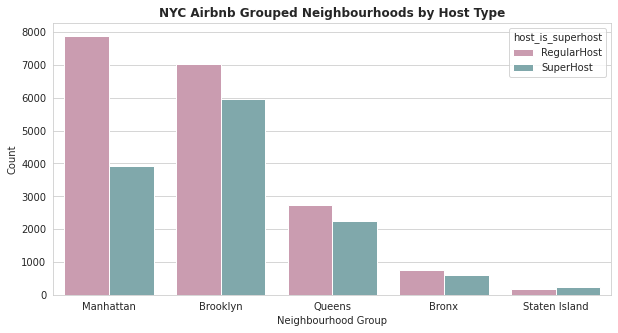

In [ ]:
# Plot host type by NYC Neighbourhoods
ax = sns.countplot(df_listings['neighbourhood_group_cleansed'], hue=df_listings.host_is_superhost, palette=['#D294AF',"#79AEB2"])
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Count');
plt.title('NYC Airbnb Grouped Neighbourhoods by Host Type',fontweight="bold")

Majority of super hosts are from the *Brooklyn*  while *Queens, Bronx and Staten Island* have nearly an equal amount of host types 

In [16]:
# Remove trailing characters  and change data type into float
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0


In [39]:
df_listings.host_response_time.value_counts()

within an hour        18825
within a few hours     6941
within a day           4028
a few days or more      855
Name: host_response_time, dtype: int64

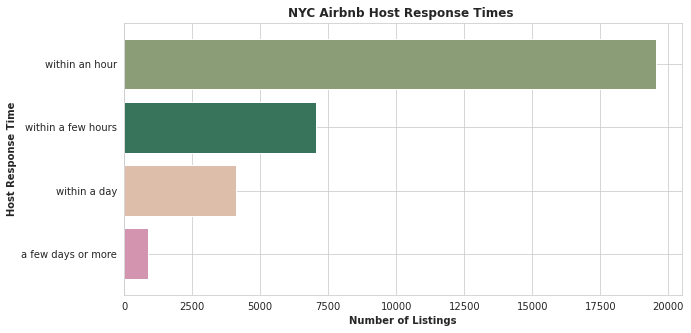

In [ ]:
# Plot Host Response Times Frequencies
feq = df_listings['host_response_time'].value_counts().sort_index()
feq.plot.barh(figsize=(10,5), width=0.8, rot=0, color=['#D294AF', '#DDBEAA','#37745B','#8B9D77'])
plt.title('NYC Airbnb Host Response Times ', fontweight="bold")
plt.xlabel('Number of Listings', fontweight="bold")
plt.ylabel('Host Response Time', fontweight="bold")
plt.show()

Most hosts respons within an hour up to the few hours. Let's further compare with response rate

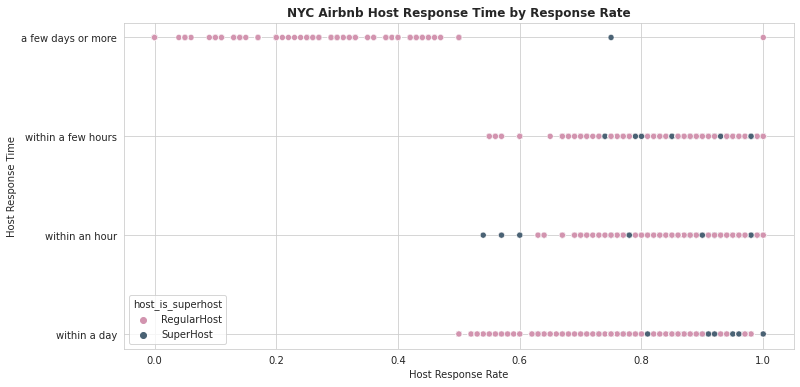

In [38]:
# Plot  host_response_time by their response_rate
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.host_response_rate,df_listings.host_response_time,hue=df_listings.host_is_superhost, palette=['#D294AF',"#4A6274"])
plt.ioff()
plt.title('NYC Airbnb Host Response Time by Response Rate',fontweight="bold")
plt.ylabel('Host Response Time')
plt.xlabel('Host Response Rate');

The hosts that have responded within a few days or more have been received lower ratings up to 0.45%. from the plot we can see that if hosts can respond within a few hours up to maximum within a da there is higher chance to get better ratings. The majority of the super hosts also fall in this gap which proofs their responsibility.

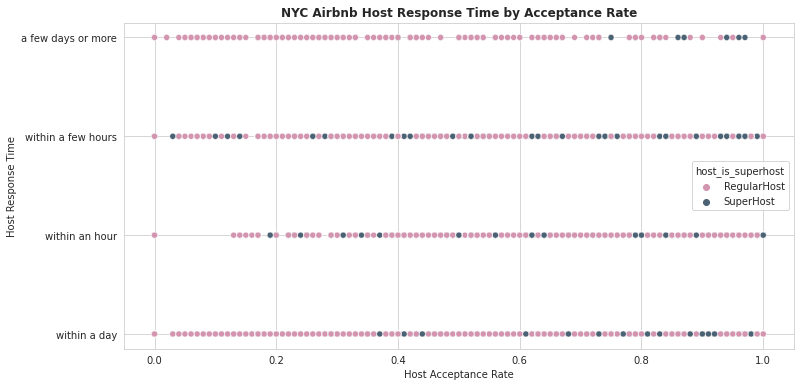

In [40]:
# Plot host_respons_time by  thier acceptance_rate
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.host_acceptance_rate,df_listings.host_response_time,hue=df_listings.host_is_superhost, palette=['#D294AF',"#4A6274"])
plt.ioff()
plt.title('NYC Airbnb Host Response Time by Acceptance Rate',fontweight="bold")
plt.ylabel('Host Response Time')
plt.xlabel('Host Acceptance Rate');

In [ ]:
#  Get summary of the dataframe
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31538 entries, 0 to 37873
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31538 non-null  int64  
 1   name                                          31538 non-null  object 
 2   description                                   31538 non-null  object 
 3   neighborhood_overview                         31538 non-null  object 
 4   picture_url                                   31538 non-null  object 
 5   host_name                                     31538 non-null  object 
 6   host_about                                    31538 non-null  object 
 7   host_response_time                            31538 non-null  object 
 8   host_response_rate                            31538 non-null  float64
 9   host_acceptance_rate                          31538 non-null 

In [ ]:
# Check data type of price column
df_listings.price.dtype

dtype('O')

In [17]:
# Change price column type into float
df_listings['price'] = df_listings['price'].str.replace('$','')
df_listings['price'] = df_listings['price'].str.replace(',','').astype('float64')

In [18]:
# Drop null values in column abou_host
df_listings.dropna(subset=['host_about'], inplace=True)

In [ ]:
# Preview sample values
df_listings['host_about']

0                                                                                                                                                                                                   A New Yorker since 2000! My passion is creating beautiful, unique spaces where unforgettable memories are made. It's my pleasure to host people from around the world and meet new faces. Welcome travelers! \r\n\r\nI am a Sound Therapy Practitioner and Kundalini Yoga & Meditation teacher. I work with energy and sound for relaxation and healing, using Symphonic gong, singing bowls, tuning forks, drums, voice and other instruments.
3                                                                                                                                                                                                                                                                                                                                                                                   

In [19]:
# Drop rows that contains word 'hidden'
df_listings =  df_listings[df_listings["host_about"].str.contains("hidden")==False]

In [ ]:
df_listings['host_about']

0                                                                                                                                                                                                   A New Yorker since 2000! My passion is creating beautiful, unique spaces where unforgettable memories are made. It's my pleasure to host people from around the world and meet new faces. Welcome travelers! \r\n\r\nI am a Sound Therapy Practitioner and Kundalini Yoga & Meditation teacher. I work with energy and sound for relaxation and healing, using Symphonic gong, singing bowls, tuning forks, drums, voice and other instruments.
3                                                                                                                                                                                                                                                                                                                                                                                   

In [ ]:
# Create a function to preprocess text column 
def clean_text(text):
    '''
    input- 'text' to be preprocessed
    output- converts input 'text' to lowercase,remove square brackets,links,punctuation 
    and words containing numbers. Removes common accent characters and returns clean text. 
    '''
    text= re.sub('[0-9\n]',' ',text)
    text = text.lower()
    text = re.sub('',"", text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) 
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    #text = re.sub('[^a-zA-Z]', '', str(text))
    return text

In [ ]:
# Apply fucntion into text column host_about
df_listings['host_about'] = df_listings['host_about'].apply(lambda x: clean_text(x))
df_listings['host_about']

0                                                                                                                                                                                           a new yorker since       my passion is creating beautiful  unique spaces where unforgettable memories are made  it s my pleasure to host people from around the world and meet new faces  welcome travelers      i am a sound therapy practitioner and kundalini yoga   meditation teacher  i work with energy and sound for relaxation and healing  using symphonic gong  singing bowls  tuning forks  drums  voice and other instruments 
3                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
# Create runction to remove single characters within the text
def single_char(text):
  text = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '',text)
  return text;

In [ ]:
# Apply function to remove any single characters in the text
df_listings['host_about'] = df_listings['host_about'].apply(lambda x: single_char(x))
df_listings['host_about']

0                                                                                                                                                                               new yorker since       my passion is creating beautiful  unique spaces where unforgettable memories are made  it my pleasure to host people from around the world and meet new faces  welcome travelers      am sound therapy practitioner and kundalini yoga   meditation teacher  work with energy and sound for relaxation and healing  using symphonic gong  singing bowls  tuning forks  drums  voice and other instruments 
3                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
# Count an unique values
df_listings.host_is_superhost.value_counts()

RegularHost    18076
SuperHost      12573
Name: host_is_superhost, dtype: int64

In [31]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
#  Import nltk related libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Set stop words
stop_words = set(stopwords.words("english")) 

In [ ]:
# Create seperate DataFrame for super/regular hosts
superhost = df_listings[df_listings['host_is_superhost'].str.contains('SuperHost')==True]# superhost about dataframe
regulhost = df_listings[df_listings['host_is_superhost'].str.contains('RegularHost')==True] # regularhost about dataframe


In [ ]:
superhost.host_is_superhost

5        SuperHost
8        SuperHost
10       SuperHost
12       SuperHost
17       SuperHost
           ...    
37287    SuperHost
37294    SuperHost
37306    SuperHost
37311    SuperHost
37454    SuperHost
Name: host_is_superhost, Length: 12573, dtype: object

In [ ]:
# Assign word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500,
                    max_font_size = 100, random_state = 42, width=800, height=400,colormap='Set1')

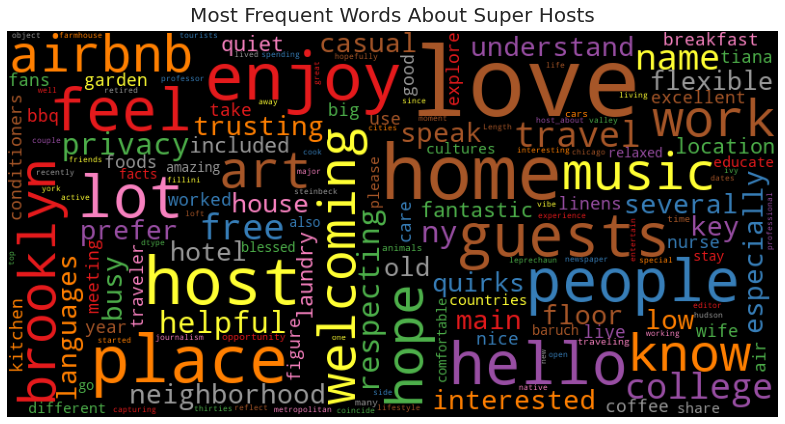

In [ ]:
# Plot word cloud (frequent words) about super host
wordcloud.generate(str(superhost['host_about']))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud);
plt.title(f"Most Frequent Words About Super Hosts", fontdict={'size': 20, 
                                                        'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

Based on the above word cloud we can say that super hosts are makie emphesases on being welcoming, helpful. *Enjoy, Love, Feel, Excellent* are also the main characteristics.

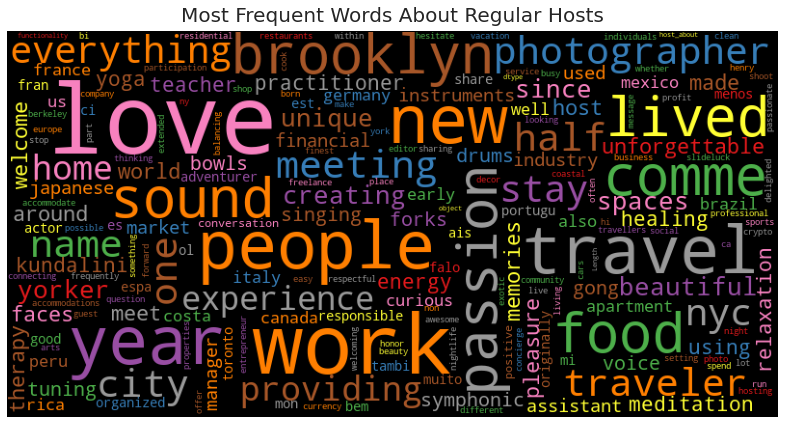

In [ ]:
# Plot word cloud (frequent words) about regular host
wordcloud.generate(str(regulhost['host_about']))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud);
plt.title(f"Most Frequent Words About Regular Hosts", fontdict={'size': 20, 
                                                        'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()  

Regular hosts are expressed with the frequent words  such as  *Love, Work,Food, Unique and Unforgettable*

In [ ]:
#  Get summary of the DataFrame
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30649 entries, 0 to 37873
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30649 non-null  int64  
 1   name                                          30649 non-null  object 
 2   description                                   30649 non-null  object 
 3   neighborhood_overview                         30649 non-null  object 
 4   picture_url                                   30649 non-null  object 
 5   host_name                                     30649 non-null  object 
 6   host_about                                    30649 non-null  object 
 7   host_response_time                            30649 non-null  object 
 8   host_response_rate                            30649 non-null  float64
 9   host_acceptance_rate                          30649 non-null 

#### **EDA Neighbourhoods**

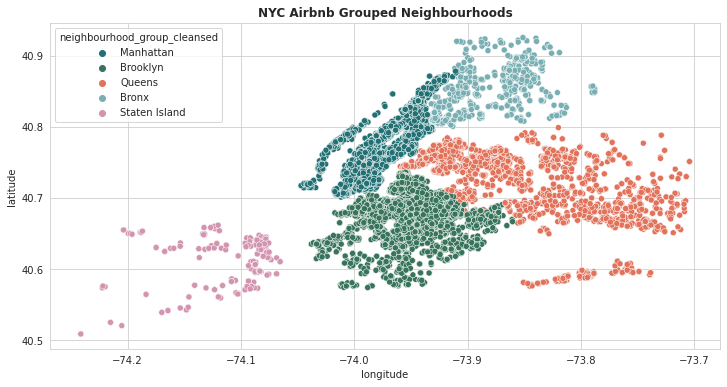

In [ ]:
# POT distribution map of listings based on NYC neighbourhoods
plt.figure(figsize=(12,6))
sns.scatterplot(df_listings.longitude,df_listings.latitude,hue=df_listings.neighbourhood_group_cleansed, 
                palette=['#217074','#37745B','#E2725A',"#79AEB2", '#D294AF'])
plt.ioff()
plt.title('NYC Airbnb Grouped Neighbourhoods',fontweight="bold")
plt.show();

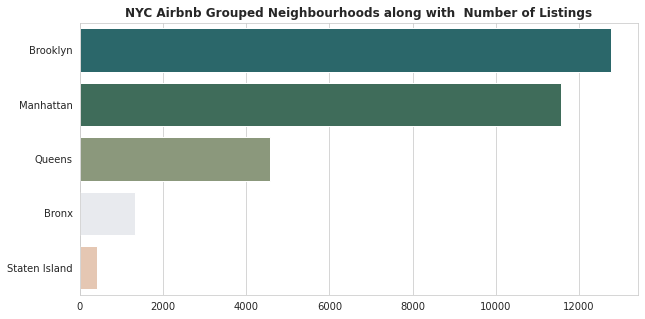

In [ ]:
# Which grouped neighborhood has the highest number of listings?
plt.figure(figsize=(10,5))
sns.barplot(y = df_listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=False).keys(),
        x = df_listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=False).values, 
        orient='h', palette=['#217074','#37745B','#8B9D77','#E7EAEF','#EDC5AB']);
plt.title('NYC Airbnb Grouped Neighbourhoods along with  Number of Listings',fontweight="bold")
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Neighborhoods Group');


The majority of the listings (11000/14000) are located in *Brooklyn and Manhattan* while *Staten Island* is in the last place with the least amount of the  listings.

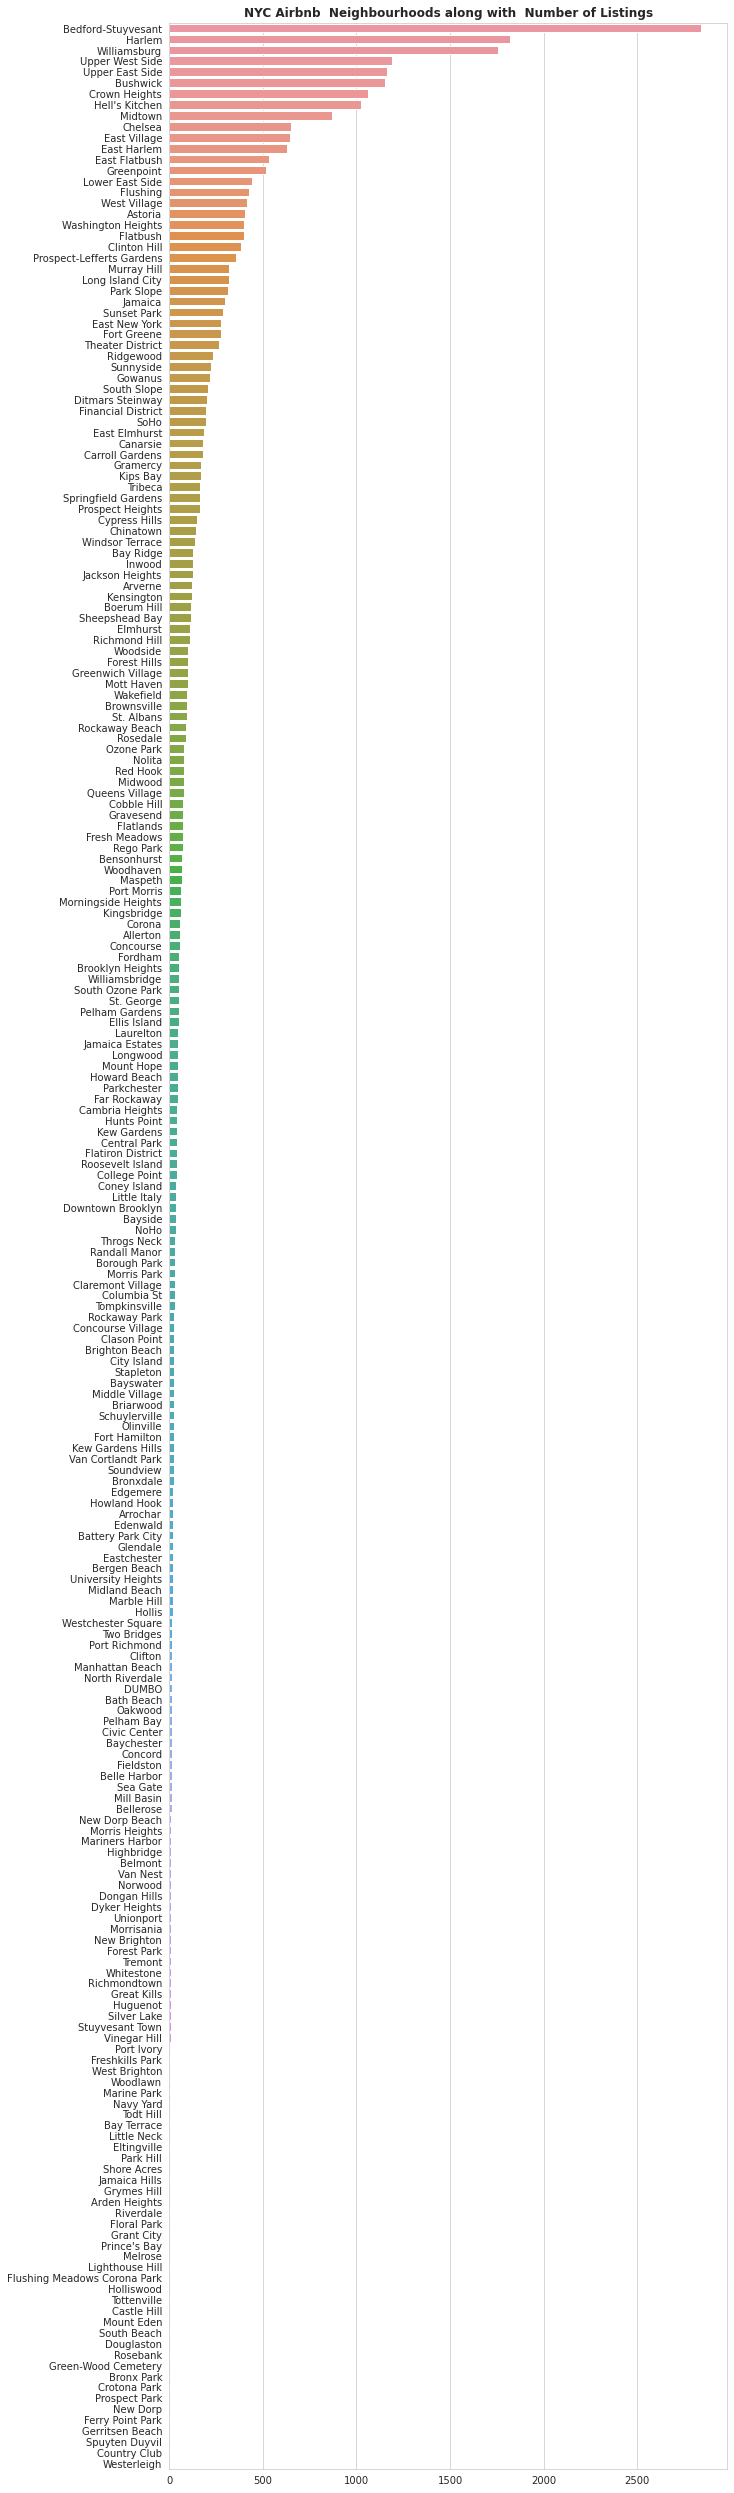

In [ ]:
# Which detailed neighborhood has the highest number of listings?
plt.figure(figsize=(10,45))
sns.barplot(y = df_listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=False).keys(),
        x = df_listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=False).values, 
        orient='h');
plt.title('NYC Airbnb  Neighbourhoods along with  Number of Listings',fontweight="bold")
ax.set_xlabel('Number of Listings')
ax.set_ylabel('NYC Neighborhoods');


The top 10 neighbourgood  which includes the most of the listings are *Bedford-Stuyvesant, Harlem, Williamsburg, Upper West Side, Upper East Side, Bushwick,Crown Heights, Hell's Kitchen, Midtown and Chelsea.*

In [ ]:
df_listings = df_listings.reset_index()

In [ ]:
# Average price per neighborhood
price_per_neighb = df_listings.groupby(['neighbourhood_group_cleansed'])['price'].mean()
price_per_neighb = price_per_neighb.reset_index()

In [ ]:
# Plot scatter mapbox of price in accordance with location
import plotly.express as px
fig = px.scatter_mapbox(data_frame=df_listings,
                      lat="latitude",
                      lon="longitude",
                      color="price",
                      hover_data=["price"],
                      hover_name="neighbourhood_group_cleansed",
                      height=500,
                      width=800,
                      size="price",);

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":1,"l":0,"b":0})
# Distribution of the prices by location
fig.show();

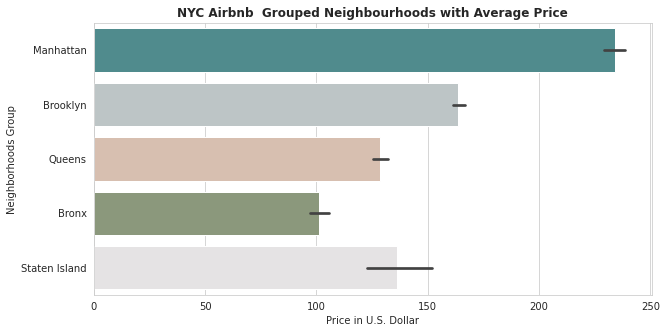

In [ ]:
# PLot grouped neighborhoods with their average price 
plt.figure(figsize=(10,5))
ax = sns.barplot(y = df_listings['neighbourhood_group_cleansed'], x = df_listings['price'],
                 data = price_per_neighb, orient='h', palette=['#469597','#BBC6C8','#DDBEAA','#8B9D77','#E5E3E4'])
plt.title('NYC Airbnb  Grouped Neighbourhoods with Average Price',fontweight="bold")
ax.set_xlabel('Price in U.S. Dollar')
ax.set_ylabel('Neighborhoods Group');


Even though *Brooklyn* includes the more listings *Manhattan* listing prices are more higher. *Staten Island* also  showing more expensive listings despite the less amount of listings compare to other neighbourhoods. Average price starts from $100 and above

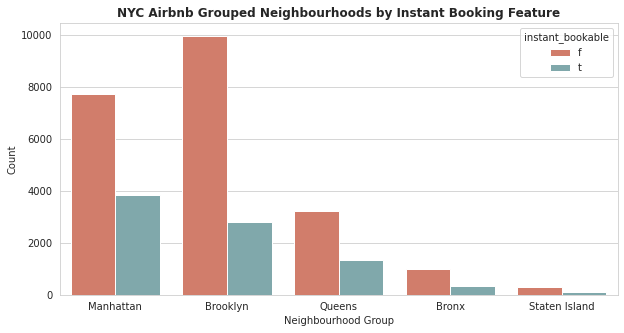

In [ ]:
# Plot grouped neighbourhoods by instant booking type
ax = sns.countplot(df_listings['neighbourhood_group_cleansed'], hue=df_listings.instant_bookable, palette=['#E2725A',"#79AEB2"])
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('NYC Airbnb Grouped Neighbourhoods by Instant Booking Feature',fontweight="bold")
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Count');


#### **EDA Property Types**

In [ ]:
# Check for an unique values
df_listings.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

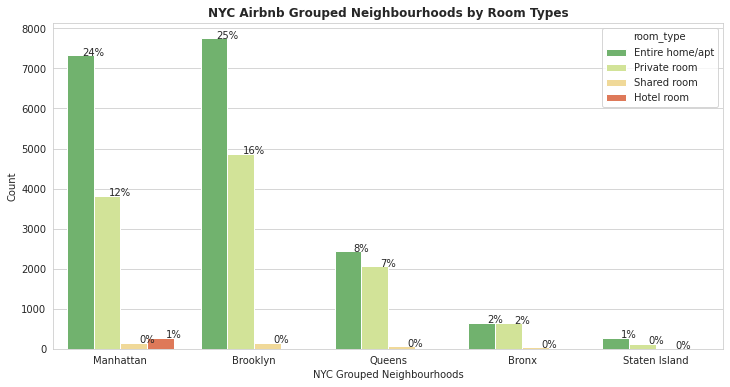

In [ ]:
# Plot distribution of room types by NYC grouped neighbourhoods
ax = sns.countplot(df_listings['neighbourhood_group_cleansed'], hue=df_listings.room_type, palette='RdYlGn_r')
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.title('NYC Airbnb Grouped Neighbourhoods by Room Types',fontweight="bold")
ax.set_xlabel('NYC Grouped Neighbourhoods')
ax.set_ylabel('Count');
# Display the percentage values on top the each bar
total = float(len(df_listings))
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

Based on the above analysis we can say that people can find *Entire home/apartment and Private rooms* almost in all NYC major 5 neighbourhoods while only Manhattan includes listings with *Hotel room* type.

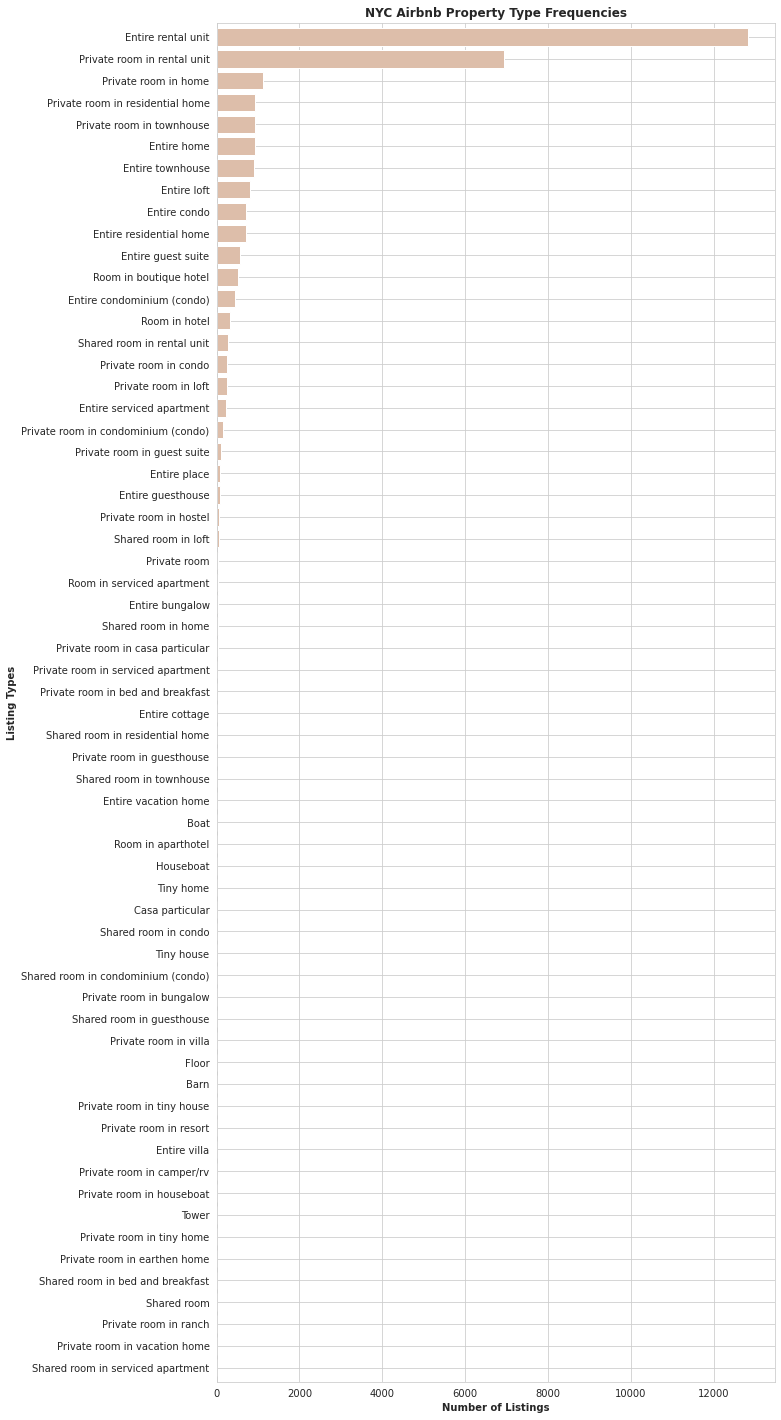

In [ ]:
# Count and plot property types
freq_ptype = df_listings['property_type'].value_counts().sort_values(ascending=True)
freq_ptype.plot.barh(figsize =(10,25),width=0.8, color='#DDBEAA')
plt.title('NYC Airbnb Property Type Frequencies',fontweight="bold")
plt.xlabel('Number of Listings', fontweight="bold")
plt.ylabel('Listing Types', fontweight="bold");
plt.show();

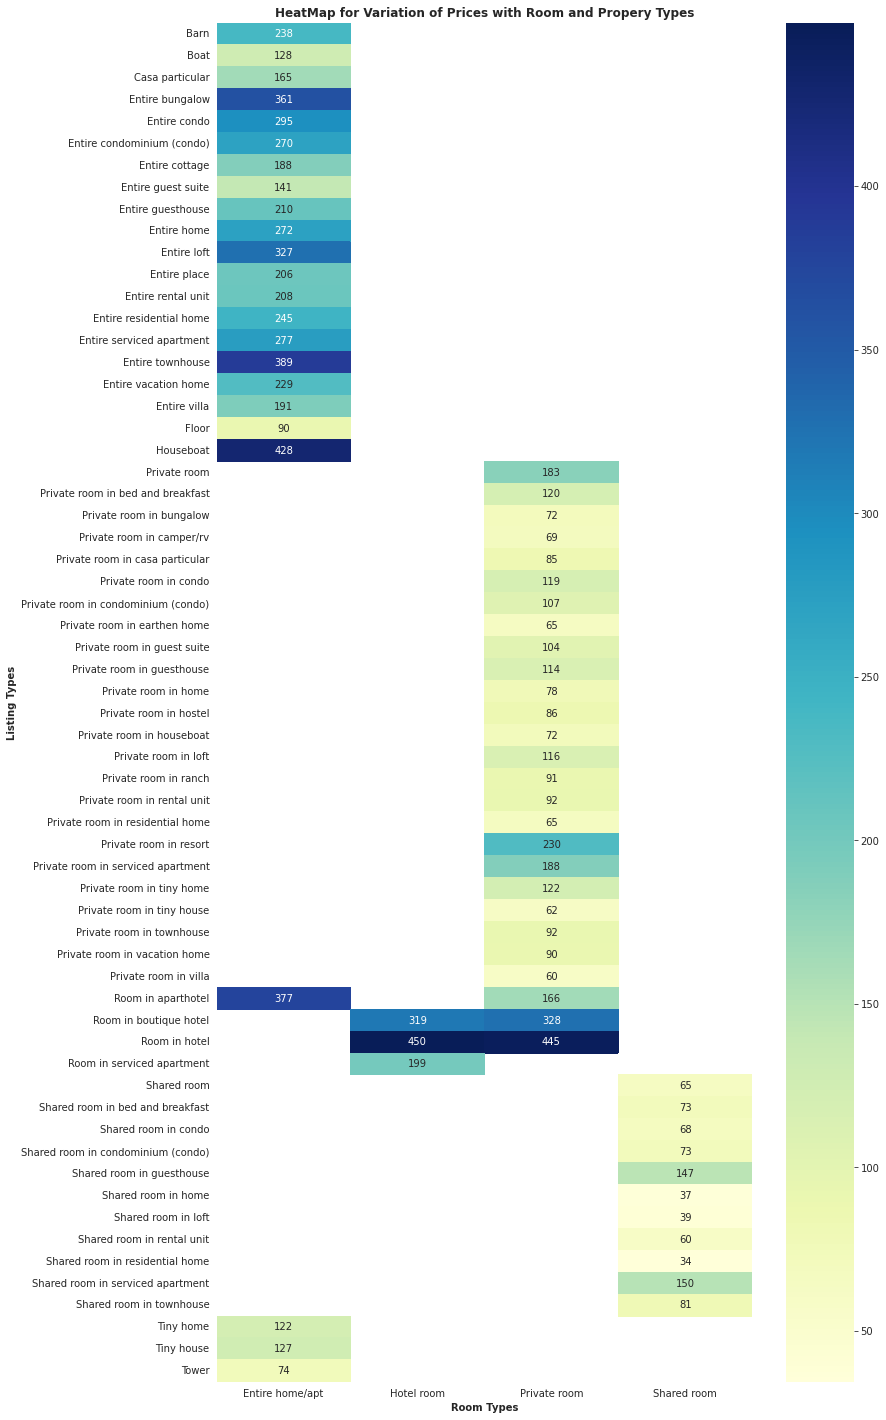

In [20]:
# HeatMap for variation of prices with room and propery types
plt.figure(figsize=(12,25))
sns.heatmap(df_listings.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('HeatMap for Variation of Prices with Room and Propery Types',fontweight="bold")
plt.xlabel('Room Types', fontweight="bold")
plt.ylabel('Listing Types', fontweight="bold");

This chart allows us to see all the listings' prices broken down by <mark>property_type</mark> and <mark>roo_type</mark> in **NYC**. It can be analyzed that for almost all Property types, prices for Entire Home/Apartment is the maximum. This tells us that Property type and Room type plays a very important role in deciding price of a listing. Lets see how the number of bedrooms available affects the price of a listing

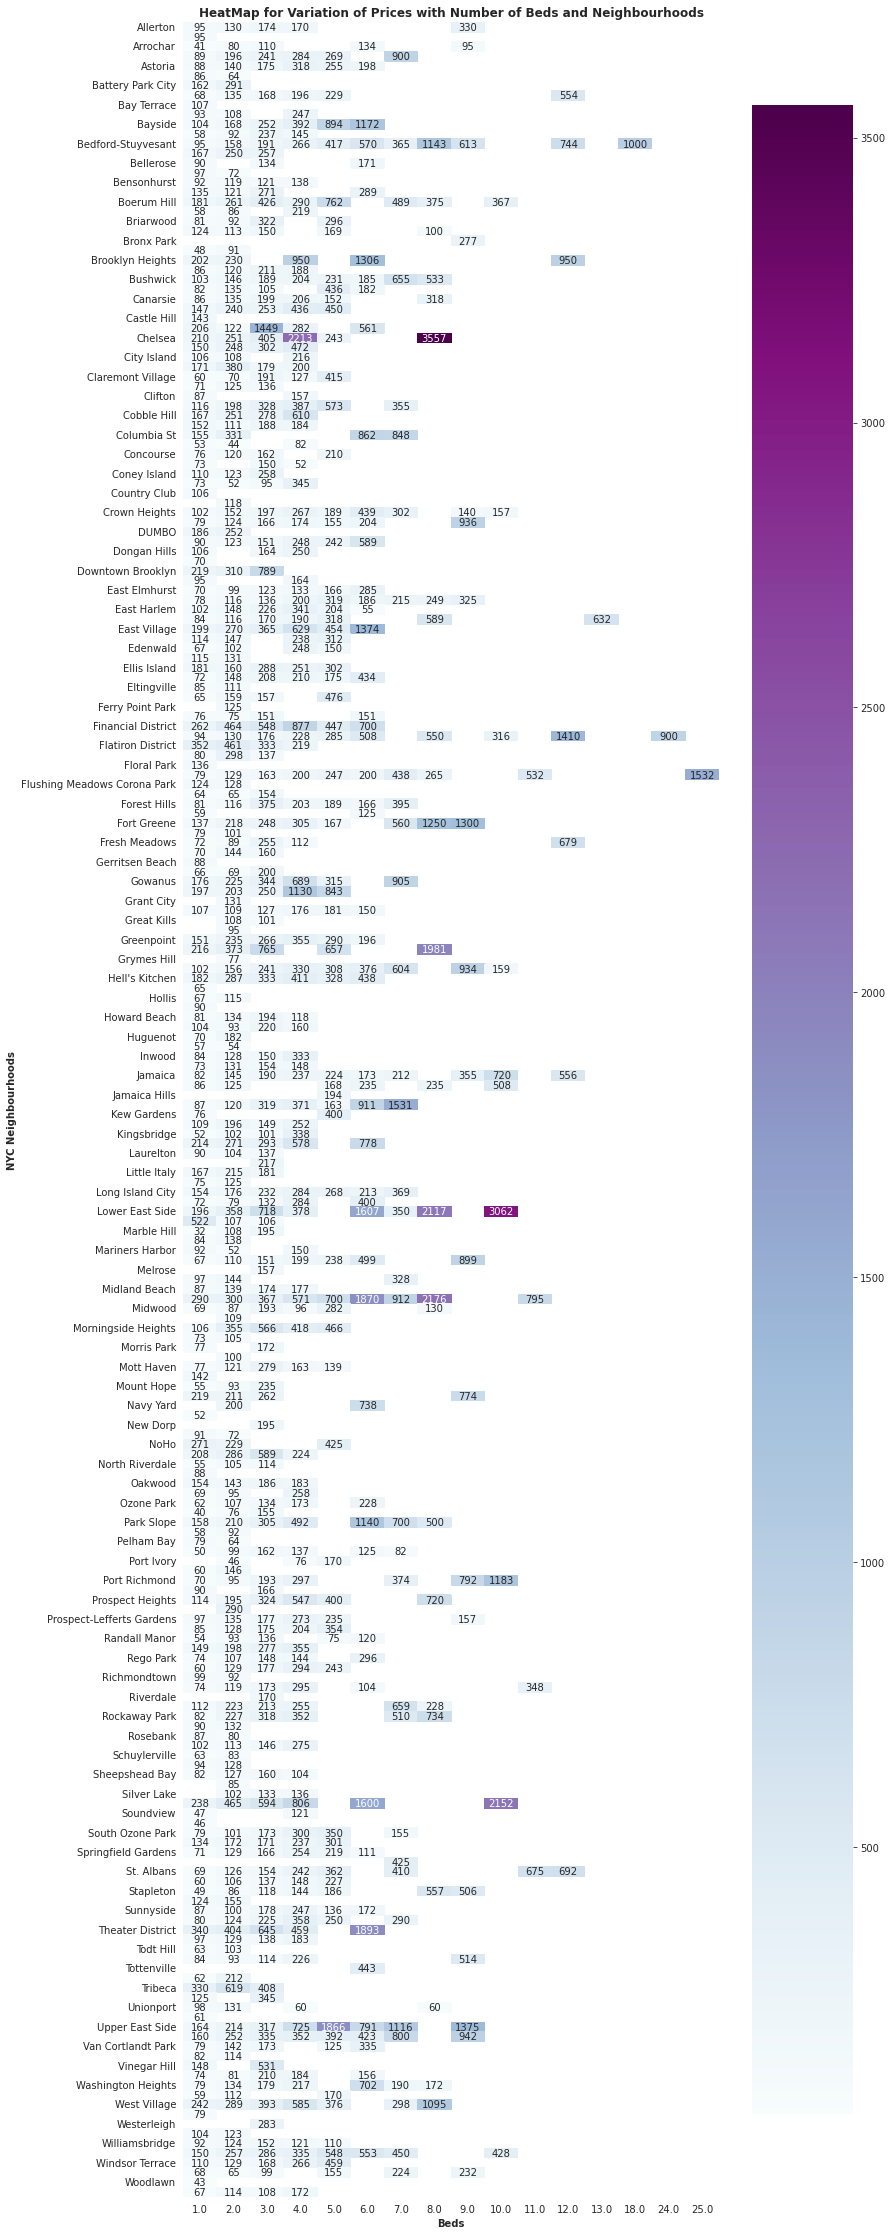

In [25]:
# HeatMap for variation of prices with number of beds for listings and neighbourhoods
plt.figure(figsize=(12,40))
sns.heatmap(df_listings.groupby([
        'neighbourhood_cleansed', 'beds']).price.mean().unstack(),annot=True, fmt=".0f",cmap="BuPu")
plt.title('HeatMap for Variation of Prices with Number of Beds and Neighbourhoods',fontweight="bold")
plt.xlabel('Beds', fontweight="bold")
plt.ylabel('NYC Neighbourhoods', fontweight="bold");

In [33]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [34]:
# Analyzing what amenities costs more
amenities = df_listings[['amenities','price','id',]]
amenities_top = amenities.sort_values('price',ascending=[0])
amenities_top = amenities_top.head(30)
allemenities = ''
for index,row in amenities_top.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

all_amenities_df=nltk.word_tokenize(allemenities)
filtered_data=[word for word in all_amenities_df if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(all_amenities_df)

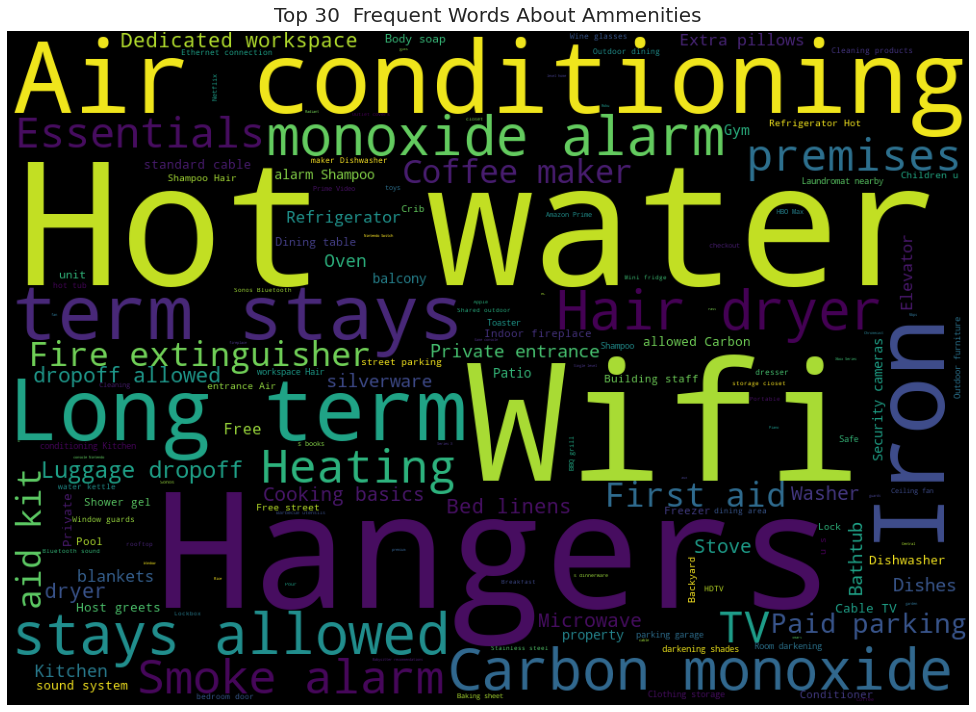

In [35]:
# Plot top 30 ammenities word cloud 
wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_words)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title(f"Top 30  Frequent Words About Ammenities", fontdict={'size': 20, 
                                                        'verticalalignment': 'bottom'})
plt.tight_layout() ;

The most frequent words that appear within the ammenities sections are *Air Conditioning, Hot water,Hangers,Wifi, Terms, Hiar Dryer and Heating*

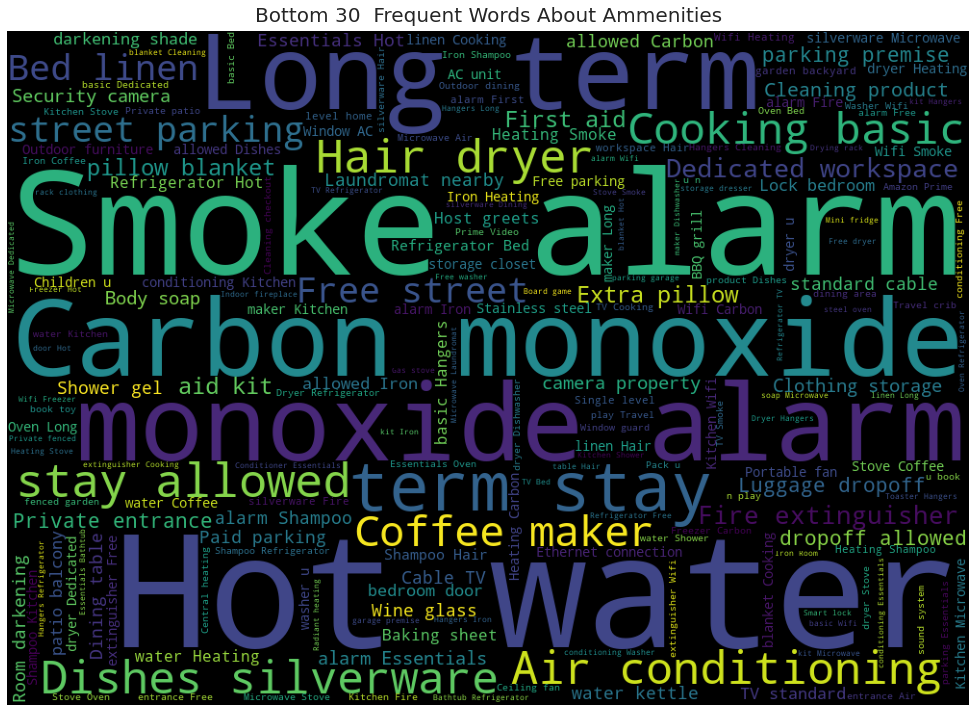

In [36]:
# Plot bottom (rare) 30 ammenities word cloud 
amenities_bott = df_listings.sort_values('price',ascending=[1])
amenities_Fbott=amenities_bott.head(30)

allemenities_bott = ''
for index,row in amenities_bott.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities_bott+=p

allemenities_df_bott=nltk.word_tokenize(allemenities_bott)
filtered_datab=[word for word in allemenities_df_bott if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_df_bott=[wnl.lemmatize(data) for data in filtered_datab]
allemenities_wordsb=' '.join(allemenities_df_bott)


wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_wordsb)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title(f"Bottom 30  Frequent Words About Ammenities", fontdict={'size': 20, 
                                                        'verticalalignment': 'bottom'})
plt.tight_layout()  

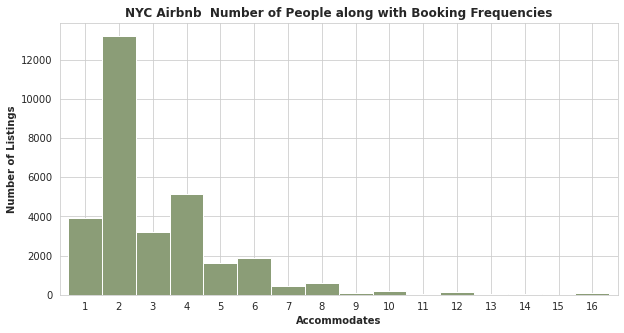

In [37]:
# Plot NYC Airbnb  Number of by Booking Freaquency
feq = df_listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10,5), width=1, rot=0, color='#8B9D77')
plt.title('NYC Airbnb  Number of People along with Booking Frequencies', fontweight="bold")
plt.ylabel('Number of Listings', fontweight="bold")
plt.xlabel('Accommodates', fontweight="bold")
plt.show()

Majority of the people make booking for 2 person while 3,4,1 number of people far more less compare to 2 people booking.

In [ ]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30649 entries, 0 to 30648
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         30649 non-null  int64  
 1   id                                            30649 non-null  int64  
 2   name                                          30649 non-null  object 
 3   description                                   30649 non-null  object 
 4   neighborhood_overview                         30649 non-null  object 
 5   picture_url                                   30649 non-null  object 
 6   host_name                                     30649 non-null  object 
 7   host_about                                    30649 non-null  object 
 8   host_response_time                            30649 non-null  object 
 9   host_response_rate                            30649 non-null 

#### **4. Findings and Explorations**

##### **4.1. Cleaning Process**

- The overall dataset had few null values for within some features. We dropped some of the unnecessary columns.
- Within the text columns   have been applied some text preprocessing techniques such: oconverting into lowercase,remove square brackets,links,punctuation and words containing numbers. 


##### **4.2. Exploration**

An Exploratory data analysis have been applied based on the following sections:<p>
**Host Type**<p>
- Majority of super hosts are from the Brooklyn while *Queens, Bronx* and *Staten Island* have nearly an equal amount of host types (super/regular)
- The hosts that have responded within a few days or more have been received lower ratings up to 0.45%. from the plot we can see that if hosts can respond within a few hours up to maximum within a da there is higher chance to get better ratings. The majority of the super hosts also fall in this gap which proofs their responsibility.
- Based on the above word cloud we can say that super hosts are makie emphesases on being welcoming, helpful. *Enjoy, Love, Feel, Excellent* are also the main characteristics.
- Regular hosts are expressed with the frequent words  such as  *Love, Work,Food, Unique and Unforgettable*

**Neighbourhoods**<p>
- The majority of the listings (11000/14000) are located in *Brooklyn* and *Manhattan* while *Staten Island* is in the last place with the least amount of the listings.
- The top 10 neighbourgood which includes the most of the listings are: *Bedford-Stuyvesant, Harlem, Williamsburg, Upper West Side, Upper East Side, Bushwick,Crown Heights, Hell's Kitchen, Midtown and Chelsea*.
- Even though Brooklyn includes the more listings Manhattan listing prices are more higher. Staten Island also showing more expensive listings despite the less amount of listings compare to other neighbourhoods. Average price starts from $100 and above<p>

**Property Types**<p>
- Based on the above analysis we can say that people can find *Entire home/apartment and Private rooms* almost in all NYC major 5 neighbourhoods while only Manhattan includes listings with *Hotel room* type.
- Almost all property types, prices for Entire Home/Apartment is the maximum. This tells us that Property type and Room type plays a very important role in deciding price of a listing.
- The most frequent words that appear within the ammenities sections are: *Air Conditioning, Hot water,Hangers,Wifi, Terms, Hiar Dryer and Heating.*